In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss
import requests # For downloading the website
from bs4 import BeautifulSoup # For parsing the website
import time # To put the system to sleep
import random # for random numbers
import country_converter as coco
import sqlite3
import seaborn as sns## implement a maploptlib thing 
import matplotlib.pyplot as plt## a library to build plot 
pd.options.display.max_rows = 10000

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN_C
from sklearn.neighbors import KNeighborsRegressor as KNN_R
from sklearn.ensemble import RandomForestClassifier as RF_C
from sklearn.ensemble import RandomForestRegressor as RF_R
from sklearn.tree import DecisionTreeRegressor as DTree_R
from sklearn.linear_model import LogisticRegression as LR
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)
##For country names standardization
import country_converter as coco
# Misc
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st

# 1. Problem statement and Background

With the further deepening of globalization, the international mobility of students is increasing.  My goals for this project are to examine which factors of a country are correlated with and predict international student mobility as measured through the number of students coming to study in a target country pursuing higher education. Due to its rising quality of higher education and increasing international influence, China is becoming a destination country for university students from many countries. Thus it is an ideal country to study international student mobility.

Based on the Push-Pull theory, I collected several variables of the origin country to serve as predictors. predicted of, international student mobility as measured through the number of students coming to study in a target country pursuing higher education. 


##### The Push-Pull theory

The Push-Pull theory is the basic theory that explains population migration. In paper entitled "The Law of Migration", Ernst G. Ravenstein, a British scholar, pointed out that the factors affecting migration can be summarized as "push" and "pull" factors. The "push" factor refers to the exclusionary forces in the country of origin (country) that are not conducive to survival and development, while the "pull" factor refers to the attractiveness of the destination(country). Both factors are forces that contribute to population migration and are the driving force behind population movement. Based on the hypothesis of Push-Pull theory, this study selects factors of two kinds.

The push factors of the study including:gross college enrollment rate, student-teacher ratio of higher education, and Financial expenditure per capita for higher education, GDP per capital, the number of R&D researchers (per million people). And the pull factors of the study including: number of international students getting scholarship, academic recognition between China and the country of origin, the total trade volume between two countries, the geographical distance between two countries and the number of outbound students of the origin country are served as control variables in the estimate of international students mobility.

Here, I listed the source of data in this study:

UNESCO database link: http://data.uis.unesco.org/
Gross college enrollment rate, student-teacher ratio of higher education, the financial expenditure per capita for higher education and the number of outbound students of the origin country

Wordbank database link: https://data.worldbank.org.cn/
GDP per capital, the number of R&D researchers (per million people)

CEPII Database link: http://www.cepii.fr/CEPII/en/bdd_modele/bdd.asp
The geographical distance between China and the origin country

Concise Statistics of International Students Coming to China(2010-2018)
The number of students coming to study in China, the chance for international students to get scholarship

China Academic Degrees & Graduate Education Information link:http://www.cdgdc.edu.cn/xwyyjsjyxx/dwjl/xwhr/276318.shtml
The academic recognition between China and the origin countries

UN Comtrade database link: https://comtrade.un.org/
The total trade volume between China and the origin countries

Belt and Road portal link: https://www.yidaiyilu.gov.cn/
The R&B country list

# 2. Methods I explored.

In data collection and manipulation, I explored using scrapers to scrap the R&B country list on the government website and use the panda's libraries to manipulate the data; then, I used SQL to store the cleaned data.

### data cleaning process 

In [4]:
## clean the variable of "unemployment"
unemployment=pd.read_excel('unemployment.xls',header=3,names=None)##importe the data
unemployment.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.69,NaN,7.910000,NaN,NaN,11.180000,NaN,NaN,11.71
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.343155,NaN,NaN,7.097686,NaN,NaN,NaN


In [5]:
unemployment.columns##check out the column names 
unemployment=unemployment.set_index('Country Name')##change the index

In [6]:
E0=unemployment.iloc[:,53:62]##select the part we need
E0.head(4)

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Aruba,10.6,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,1.69,NaN,7.910000,NaN,NaN,11.180000,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,4.343155,NaN,NaN,7.097686,NaN


In [7]:
E0['Country Name'] = E0.index##copy the index
E0.head(4)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country Name
Country Name,,,,,,,,,,
Aruba,10.6,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa Eastern and Southern
Afghanistan,NaN,NaN,1.69,NaN,7.910000,NaN,NaN,11.180000,NaN,Afghanistan
Africa Western and Central,NaN,NaN,NaN,NaN,4.343155,NaN,NaN,7.097686,NaN,Africa Western and Central


In [8]:
####standardize the countries name
cc = coco.CountryConverter()
E0["Country_Name_stan"] = cc.convert(E0["Country Name"], to = 'name_short')

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

In [9]:
E1=E0.set_index('Country_Name_stan')##change the index
E2=E1.drop(columns=["Country Name"])##drop extra columns 
E2.head(4)

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country_Name_stan,,,,,,,,,
Aruba,10.6,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,1.69,NaN,7.910000,NaN,NaN,11.180000,NaN
not found,NaN,NaN,NaN,NaN,4.343155,NaN,NaN,7.097686,NaN


In [10]:
E2['Country Name'] = E2.index##copy the index 

In [11]:
##reshape the df into long formate 
E3=pd.melt(E2,id_vars=['Country Name'])
E3=E3.rename(columns={"value":"unemployment"})##rename the column
E3=E3.rename(columns={"variable":"year"})##rename the column
E3.head(4)

,Country Name,year,unemployment
0,Aruba,2010,10.6
1,not found,2010,NaN
2,Afghanistan,2010,NaN
3,not found,2010,NaN


In [12]:
E3.dtypes

Country Name     object
year             object
unemployment    float64
dtype: object

In [13]:
E3["year"] = E3["year"].astype('int')##change the data type
E3.dtypes

Country Name     object
year              int32
unemployment    float64
dtype: object

import the old data frame

In [14]:
students_CTC = pd.read_excel("students_coing_to_China.xlsx")
students_CTC.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital
0,Asia,Afghanistan,10,225,115,9,124,101,63,30.1884,3.6986,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030
1,Asia,Afghanistan,11,291,155,16,171,120,90,31.8953,3.6223,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366
2,Asia,Afghanistan,12,335,181,24,205,130,95,29.2280,5.1584,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901
3,Asia,Afghanistan,13,385,210,41,251,134,102,26.5606,6.6945,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651


In [15]:
students_CTC["Country Name"] = cc.convert(students_CTC["country"], to = 'name_short')
students_CTC.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name
0,Asia,Afghanistan,10,225,115,9,124,101,63,30.1884,3.6986,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan
1,Asia,Afghanistan,11,291,155,16,171,120,90,31.8953,3.6223,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan
2,Asia,Afghanistan,12,335,181,24,205,130,95,29.2280,5.1584,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan
3,Asia,Afghanistan,13,385,210,41,251,134,102,26.5606,6.6945,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan


In [16]:
students_CTC.loc[students_CTC['year'] == 10,'year'] = 2010
students_CTC.loc[students_CTC['year'] == 11,'year'] = 2011
students_CTC.loc[students_CTC['year'] == 12,'year'] = 2012
students_CTC.loc[students_CTC['year'] == 13,'year'] = 2013
students_CTC.loc[students_CTC['year'] == 14,'year'] = 2014
students_CTC.loc[students_CTC['year'] == 15,'year'] = 2015
students_CTC.loc[students_CTC['year'] == 16,'year'] = 2016
students_CTC.loc[students_CTC['year'] == 17,'year'] = 2017
students_CTC.loc[students_CTC['year'] == 18,'year'] = 2018
students_CTC.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,3.6986,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,3.6223,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,5.1584,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,6.6945,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan


In [17]:
students_CTC.dtypes

region                   object
country                  object
year                      int64
stu_CTC                   int64
stu_undergra              int64
stu_postgra               int64
stu_degree                int64
stu_non_degree            int64
scholarship_num_CTC       int64
stu_teacher_ratio       float64
enrol_higheredu         float64
financial_percapital    float64
Academic_recognition      int64
outbound_higheredu        int64
value_of_trade            int64
distance                float64
RD_number               float64
GDP _percapital         float64
Country Name             object
dtype: object

In [18]:
##merge the two columns based on "country"
students_CTC_new0=pd.merge(students_CTC,E3,on=["Country Name","year"])
students_CTC_new0.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name,unemployment
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,3.6986,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan,NaN
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,3.6223,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan,NaN
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,5.1584,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan,1.69
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,6.6945,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan,NaN


In [19]:
E4=students_CTC_new0.filter(["Country Name","year","unemployment"])
E4.head(4)

,Country Name,year,unemployment
0,Afghanistan,2010,NaN
1,Afghanistan,2011,NaN
2,Afghanistan,2012,1.69
3,Afghanistan,2013,NaN


In [20]:
##reshape the data frame to wide for cleaning purpose
E5=E4.pivot_table(values='unemployment', columns='year', index='Country Name')
E5.head(4)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Afghanistan,NaN,NaN,1.69,NaN,7.91,NaN,NaN,11.18,NaN
Albania,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.3
Algeria,9.96,9.96,10.97,9.82,10.21,11.21,10.20,13.57,NaN
Angola,9.43,7.36,NaN,NaN,9.58,NaN,NaN,NaN,NaN


In [21]:
##use linear interpolation to complete the missing values
filled_df = E5.interpolate(axis=1)
filled_df.head(4)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Afghanistan,NaN,NaN,1.69,4.80,7.91,9.00,10.09,11.18,11.18
Albania,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30
Algeria,9.96,9.96,10.97,9.82,10.21,11.21,10.20,13.57,13.57
Angola,9.43,7.36,8.10,8.84,9.58,9.58,9.58,9.58,9.58


In [22]:
filled_df.fillna(method='backfill',inplace=True,axis=1)##Fill the NAN with the values after the NAN
filled_df.head(4)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Afghanistan,1.69,1.69,1.69,4.80,7.91,9.00,10.09,11.18,11.18
Albania,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30
Algeria,9.96,9.96,10.97,9.82,10.21,11.21,10.20,13.57,13.57
Angola,9.43,7.36,8.10,8.84,9.58,9.58,9.58,9.58,9.58


In [23]:
filled_df['Country Name'] = filled_df.index##copy the index 
E6=pd.melt(filled_df,id_vars=['Country Name'])##reshape the df
E6=E6.rename(columns={"value":"unemployment"})##rename the column
E6.head(4)

,Country Name,year,unemployment
0,Afghanistan,2010,1.69
1,Albania,2010,14.09
2,Algeria,2010,9.96
3,Angola,2010,9.43


In [24]:
##merge the two columns based on "country"
students_CTC_new=pd.merge(students_CTC,E6,on=["Country Name","year"])
students_CTC_new.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name,unemployment
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,3.6986,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan,1.69
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,3.6223,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan,1.69
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,5.1584,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan,1.69
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,6.6945,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan,4.80


In [25]:
##clean the variable of "GDP per capita"
GDP_per=pd.read_excel('GDP per capita(constant2015).xls',header=3,names=None)##importe the data
GDP_per.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.719392e+09,2.682140e+09,2.794743e+09,2.803127e+09,2.962905e+09,3.025126e+09,3.085629e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.695732e+11,7.936370e+11,8.320971e+11,8.691402e+11,8.954401e+11,9.159879e+11,9.444886e+11,9.696906e+11,9.895785e+11,9.605887e+11
2,Afghanistan,AFG,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.604294e+10,1.808878e+10,1.910189e+10,1.962233e+10,1.990711e+10,2.035707e+10,2.089593e+10,2.114443e+10,2.197151e+10,2.154641e+10
3,Africa Western and Central,AFW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.045626e+11,1.065177e+11,1.105260e+11,1.186084e+11,1.250732e+11,1.301213e+11,...,6.230982e+11,6.560372e+11,6.955299e+11,7.366257e+11,7.574921e+11,7.583811e+11,7.756608e+11,7.983702e+11,8.239077e+11,8.162064e+11


In [26]:
GDP_per=GDP_per.set_index('Country Name')##change the index
G0=GDP_per.iloc[:,53:62]##select the part we need
G0.head(4)

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Aruba,2.628802e+09,2.719392e+09,2.682140e+09,2.794743e+09,2.803127e+09,2.962905e+09,3.025126e+09,3.085629e+09,NaN
Africa Eastern and Southern,7.369943e+11,7.695732e+11,7.936370e+11,8.320971e+11,8.691402e+11,8.954401e+11,9.159879e+11,9.444886e+11,9.696906e+11
Afghanistan,1.597483e+10,1.604294e+10,1.808878e+10,1.910189e+10,1.962233e+10,1.990711e+10,2.035707e+10,2.089593e+10,2.114443e+10
Africa Western and Central,5.937955e+11,6.230982e+11,6.560372e+11,6.955299e+11,7.366257e+11,7.574921e+11,7.583811e+11,7.756608e+11,7.983702e+11


In [27]:
G0['Country Name'] = G0.index##copy the index
G0.head(4)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country Name
Country Name,,,,,,,,,,
Aruba,2.628802e+09,2.719392e+09,2.682140e+09,2.794743e+09,2.803127e+09,2.962905e+09,3.025126e+09,3.085629e+09,NaN,Aruba
Africa Eastern and Southern,7.369943e+11,7.695732e+11,7.936370e+11,8.320971e+11,8.691402e+11,8.954401e+11,9.159879e+11,9.444886e+11,9.696906e+11,Africa Eastern and Southern
Afghanistan,1.597483e+10,1.604294e+10,1.808878e+10,1.910189e+10,1.962233e+10,1.990711e+10,2.035707e+10,2.089593e+10,2.114443e+10,Afghanistan
Africa Western and Central,5.937955e+11,6.230982e+11,6.560372e+11,6.955299e+11,7.366257e+11,7.574921e+11,7.583811e+11,7.756608e+11,7.983702e+11,Africa Western and Central


In [28]:
####standardize the countries name
cc = coco.CountryConverter()
G0["Country_Name_stan"] = cc.convert(G0["Country Name"], to = 'name_short')

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

In [29]:
G1=G0.set_index('Country_Name_stan')##change the index
G2=G1.drop(columns=["Country Name"])##drop extra columns 
G2.head(4)

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country_Name_stan,,,,,,,,,
Aruba,2.628802e+09,2.719392e+09,2.682140e+09,2.794743e+09,2.803127e+09,2.962905e+09,3.025126e+09,3.085629e+09,NaN
not found,7.369943e+11,7.695732e+11,7.936370e+11,8.320971e+11,8.691402e+11,8.954401e+11,9.159879e+11,9.444886e+11,9.696906e+11
Afghanistan,1.597483e+10,1.604294e+10,1.808878e+10,1.910189e+10,1.962233e+10,1.990711e+10,2.035707e+10,2.089593e+10,2.114443e+10
not found,5.937955e+11,6.230982e+11,6.560372e+11,6.955299e+11,7.366257e+11,7.574921e+11,7.583811e+11,7.756608e+11,7.983702e+11


In [30]:
G2['Country Name'] = G2.index##copy the index 
##reshape the df into long formate 
G3=pd.melt(G2,id_vars=['Country Name'])
G3=G3.rename(columns={"value":"GDP_per_capita"})##rename the column
G3=G3.rename(columns={"variable":"year"})##rename the column
G3.head(4)

,Country Name,year,GDP_per_capita
0,Aruba,2010,2.628802e+09
1,not found,2010,7.369943e+11
2,Afghanistan,2010,1.597483e+10
3,not found,2010,5.937955e+11


In [31]:
G3.dtypes

Country Name       object
year               object
GDP_per_capita    float64
dtype: object

In [32]:
G3["year"] = G3["year"].astype('int')##change the data type
G3.dtypes

Country Name       object
year                int32
GDP_per_capita    float64
dtype: object

In [33]:
##merge the two columns based on "country"
students_CTC_new1=pd.merge(students_CTC,G3,on=["Country Name","year"])
students_CTC_new1.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name,GDP_per_capita
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,3.6986,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan,1.597483e+10
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,3.6223,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan,1.604294e+10
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,5.1584,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan,1.808878e+10
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,6.6945,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan,1.910189e+10


In [34]:
G4=students_CTC_new1.filter(["Country Name","year","GDP_per_capita"])
G4.head(4)

,Country Name,year,GDP_per_capita
0,Afghanistan,2010,1.597483e+10
1,Afghanistan,2011,1.604294e+10
2,Afghanistan,2012,1.808878e+10
3,Afghanistan,2013,1.910189e+10


In [35]:
##reshape the data frame to wide for cleaning purpose
G5=G4.pivot_table(values='GDP_per_capita', columns='year', index='Country Name')
G5.head(4)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Afghanistan,1.597483e+10,1.604294e+10,1.808878e+10,1.910189e+10,1.962233e+10,1.990711e+10,2.035707e+10,2.089593e+10,2.114443e+10
Albania,1.042018e+10,1.068541e+10,1.083687e+10,1.094546e+10,1.113968e+10,1.138685e+10,1.176430e+10,1.221160e+10,1.270877e+10
Algeria,1.409771e+11,1.450654e+11,1.499976e+11,1.541976e+11,1.600571e+11,1.659792e+11,1.712905e+11,1.735173e+11,1.755995e+11
Angola,9.315928e+10,9.639375e+10,1.046279e+11,1.098117e+11,1.151075e+11,1.161936e+11,1.131958e+11,1.130292e+11,1.107645e+11


In [36]:
##use linear interpolation to complete the missing values
filled_df1 = G5.interpolate(axis=1)
filled_df1.head(4)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Afghanistan,1.597483e+10,1.604294e+10,1.808878e+10,1.910189e+10,1.962233e+10,1.990711e+10,2.035707e+10,2.089593e+10,2.114443e+10
Albania,1.042018e+10,1.068541e+10,1.083687e+10,1.094546e+10,1.113968e+10,1.138685e+10,1.176430e+10,1.221160e+10,1.270877e+10
Algeria,1.409771e+11,1.450654e+11,1.499976e+11,1.541976e+11,1.600571e+11,1.659792e+11,1.712905e+11,1.735173e+11,1.755995e+11
Angola,9.315928e+10,9.639375e+10,1.046279e+11,1.098117e+11,1.151075e+11,1.161936e+11,1.131958e+11,1.130292e+11,1.107645e+11


In [37]:
##Fill the NAN with the values after the NAN
filled_df1.fillna(method='backfill',inplace=True,axis=1)
filled_df1.head(4)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Afghanistan,1.597483e+10,1.604294e+10,1.808878e+10,1.910189e+10,1.962233e+10,1.990711e+10,2.035707e+10,2.089593e+10,2.114443e+10
Albania,1.042018e+10,1.068541e+10,1.083687e+10,1.094546e+10,1.113968e+10,1.138685e+10,1.176430e+10,1.221160e+10,1.270877e+10
Algeria,1.409771e+11,1.450654e+11,1.499976e+11,1.541976e+11,1.600571e+11,1.659792e+11,1.712905e+11,1.735173e+11,1.755995e+11
Angola,9.315928e+10,9.639375e+10,1.046279e+11,1.098117e+11,1.151075e+11,1.161936e+11,1.131958e+11,1.130292e+11,1.107645e+11


In [38]:
filled_df1['Country Name'] = filled_df1.index##copy the index 
G6=pd.melt(filled_df1,id_vars=['Country Name'])##reshape the df
G6=G6.rename(columns={"value":"GDP_per_capita"})##rename the column
G6.head(4)

,Country Name,year,GDP_per_capita
0,Afghanistan,2010,1.597483e+10
1,Albania,2010,1.042018e+10
2,Algeria,2010,1.409771e+11
3,Angola,2010,9.315928e+10


In [39]:
##merge the two columns based on "country"
students_CTC_new2=pd.merge(students_CTC_new,G6,on=["Country Name","year"])
students_CTC_new2.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,...,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name,unemployment,GDP_per_capita
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,...,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan,1.69,1.597483e+10
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,...,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan,1.69,1.604294e+10
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,...,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan,1.69,1.808878e+10
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,...,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan,4.80,1.910189e+10


In [40]:
##find China's GDP_per_capita from 2010-2018.Aim: use 
G0_China=G0.loc[G0["Country Name"] == "China"]
G0_China.iloc[:,:9]

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
China,7.554099e+12,8.275578e+12,8.926348e+12,9.619581e+12,1.033391e+13,1.106155e+13,1.181913e+13,1.264023e+13,1.349342e+13


In [41]:
##reshape the df into long formate 
G0_China1=pd.melt(G0_China,id_vars=['Country Name'])
G0_China10=G0_China1.rename(columns={'variable':'year','value':'China_GDP_per','Country Name':'China'}) 
G0_China13=G0_China10.iloc[:9,:]
G0_China13.dtypes

China            object
year             object
China_GDP_per    object
dtype: object

In [42]:
G0_China13["year"]= G0_China13["year"].astype('int')##change the data type
G0_China13["China_GDP_per"]= G0_China13["China_GDP_per"].astype('float')##change the data type
G0_China13.dtypes

China             object
year               int32
China_GDP_per    float64
dtype: object

In [43]:
students_CTC_new2.dtypes

region                   object
country                  object
year                     object
stu_CTC                   int64
stu_undergra              int64
stu_postgra               int64
stu_degree                int64
stu_non_degree            int64
scholarship_num_CTC       int64
stu_teacher_ratio       float64
enrol_higheredu         float64
financial_percapital    float64
Academic_recognition      int64
outbound_higheredu        int64
value_of_trade            int64
distance                float64
RD_number               float64
GDP _percapital         float64
Country Name             object
unemployment            float64
GDP_per_capita          float64
dtype: object

In [44]:
##merge the two df based on "country"
students_CTC_new2["year"]=students_CTC_new2["year"].astype('int')##change the data type
students_CTC_new2.dtypes

region                   object
country                  object
year                      int32
stu_CTC                   int64
stu_undergra              int64
stu_postgra               int64
stu_degree                int64
stu_non_degree            int64
scholarship_num_CTC       int64
stu_teacher_ratio       float64
enrol_higheredu         float64
financial_percapital    float64
Academic_recognition      int64
outbound_higheredu        int64
value_of_trade            int64
distance                float64
RD_number               float64
GDP _percapital         float64
Country Name             object
unemployment            float64
GDP_per_capita          float64
dtype: object

In [45]:
##left merge two data frame
students_CTC_China_new9=students_CTC_new2.merge(G0_China13,how="left",on="year")
students_CTC_China_new9.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,...,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name,unemployment,GDP_per_capita,China,China_GDP_per
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,...,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan,1.69,1.597483e+10,China,7.554099e+12
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,...,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan,1.69,1.604294e+10,China,8.275578e+12
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,...,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan,1.69,1.808878e+10,China,8.926348e+12
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,...,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan,4.80,1.910189e+10,China,9.619581e+12


In [46]:
## divide GDP_per_capita by China_GDP_per to generate a new variable called vis_a_vis_GDP
students_CTC_China_new9["vis_a_vis_GDP"]=students_CTC_China_new9["GDP_per_capita"]/students_CTC_China_new9["China_GDP_per"]
## divide scholarship_num_CTC by stu_CTC to generate a new variable called the precentage of students gain scholarship 
students_CTC_China_new9["precentage_of_scholarship"]=students_CTC_China_new9["scholarship_num_CTC"]/students_CTC_China_new9["stu_CTC"]
students_CTC_China_new9.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,...,distance,RD_number,GDP _percapital,Country Name,unemployment,GDP_per_capita,China,China_GDP_per,vis_a_vis_GDP,precentage_of_scholarship
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,...,4180.438,1101.6867,543.3030,Afghanistan,1.69,1.597483e+10,China,7.554099e+12,0.002115,0.280000
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,...,4180.438,1165.2520,528.7366,Afghanistan,1.69,1.604294e+10,China,8.275578e+12,0.001939,0.309278
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,...,4180.438,1186.6525,576.1901,Afghanistan,1.69,1.808878e+10,China,8.926348e+12,0.002026,0.283582
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,...,4180.438,1243.4696,587.5651,Afghanistan,4.80,1.910189e+10,China,9.619581e+12,0.001986,0.264935


In [47]:
##add HDI_countries_classification
HDI_countries = pd.read_excel("HDI_countries_cat.xlsx")
HDI_countries.head(4)

,Country,HDI_cat
0,United Arab Emirates,developed
1,Israel,developed
2,Singapore,developed
3,Saudi Arabia,developed


In [48]:
cc = coco.CountryConverter()
HDI_countries["Country Name"] = cc.convert(HDI_countries["Country"], to = 'name_short')##standardize country name 
HDI_countries.head(4)

,Country,HDI_cat,Country Name
0,United Arab Emirates,developed,United Arab Emirates
1,Israel,developed,Israel
2,Singapore,developed,Singapore
3,Saudi Arabia,developed,Saudi Arabia


In [49]:
students_CTC_China_new8=students_CTC_China_new9.merge(HDI_countries,how="left",on="Country Name")
students_CTC_China_new7=students_CTC_China_new8.drop(columns=["country","GDP _percapital","China","China_GDP_per","Country"])
students_CTC_China_new7.head(4)

,region,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,...,outbound_higheredu,value_of_trade,distance,RD_number,Country Name,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
0,Asia,2010,225,115,9,124,101,63,30.1884,3.6986,...,7759,178945028,4180.438,1101.6867,Afghanistan,1.69,1.597483e+10,0.002115,0.280000,Least Developed Countries
1,Asia,2011,291,155,16,171,120,90,31.8953,3.6223,...,9344,234413053,4180.438,1165.2520,Afghanistan,1.69,1.604294e+10,0.001939,0.309278,Least Developed Countries
2,Asia,2012,335,181,24,205,130,95,29.2280,5.1584,...,9685,469220111,4180.438,1186.6525,Afghanistan,1.69,1.808878e+10,0.002026,0.283582,Least Developed Countries
3,Asia,2013,385,210,41,251,134,102,26.5606,6.6945,...,13338,337854104,4180.438,1243.4696,Afghanistan,4.80,1.910189e+10,0.001986,0.264935,Least Developed Countries


In [50]:
# arrange the order of columns 
d = students_CTC_China_new7.pop('Country Name')
students_CTC_China_new7.insert(0,'Country Name', d) 
students_CTC_China_new7.head(4)

,Country Name,region,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,...,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
0,Afghanistan,Asia,2010,225,115,9,124,101,63,30.1884,...,0,7759,178945028,4180.438,1101.6867,1.69,1.597483e+10,0.002115,0.280000,Least Developed Countries
1,Afghanistan,Asia,2011,291,155,16,171,120,90,31.8953,...,0,9344,234413053,4180.438,1165.2520,1.69,1.604294e+10,0.001939,0.309278,Least Developed Countries
2,Afghanistan,Asia,2012,335,181,24,205,130,95,29.2280,...,0,9685,469220111,4180.438,1186.6525,1.69,1.808878e+10,0.002026,0.283582,Least Developed Countries
3,Afghanistan,Asia,2013,385,210,41,251,134,102,26.5606,...,0,13338,337854104,4180.438,1243.4696,4.80,1.910189e+10,0.001986,0.264935,Least Developed Countries


In [51]:
##export data to store
students_CTC_China_new7.to_excel(excel_writer=r'C:/Users/little page/Desktop/final_project/stu_CTC_new.xlsx')

Information on the data:

stu_CTC: Number of students coming to study in China(the sum of stu_degree and stu_non_degree)

stu_undergra: Number of undergraduate students coming to study in China

stu_postgra: Number of postgraduate students coming to study in China

stu_degree: Number of degree students coming to study in China(the sum of stu_undergra and stu_postgra)

stu_non_degree: Number of non-degree students coming to study in China

scholarship_num_CTC: Number of students coming to study in China with scholarship 

stu_teacher_ratio: Student-teacher ratio

enrol_higheredu: Gross college enrollment rate 

financial_percapital: Financial expenditure per capita for higher education

Academic_recognition: Academic recognition between China and the origin country 

outbound_higheredu: Number of students outbound the origin country

value_of_trade：Value of the trade between China and the origin country 

distance：The distance between China and the origin country

RD_number：Number of R&D researchers (per million people)

GDP _percapital：GDP per capital(2015 constant $)

# 3. The methods/tools I used

Since the predicted variable(number of students coming to study in China) is a continuous variable, I applied the linear model to predict it value based on the information of countries education and soc-econ features. After that I used permutation method to interpret the process of prediction, this method could help us to peek inside the black box.

# 4. Results

In [52]:
students_CTC = pd.read_excel("students_coing_to_China.xlsx")
students_CTC_new = pd.read_excel("stu_CTC_new.xlsx")
students_CTC_new.head(10)

,Unnamed: 0,Country Name,region,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,...,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
0,0,Afghanistan,Asia,2010,225,115,9,124,101,63,...,0,7759,178945028,4180.438,1101.6867,1.69,1.597483e+10,0.002115,0.280000,Least Developed Countries
1,1,Afghanistan,Asia,2011,291,155,16,171,120,90,...,0,9344,234413053,4180.438,1165.2520,1.69,1.604294e+10,0.001939,0.309278,Least Developed Countries
2,2,Afghanistan,Asia,2012,335,181,24,205,130,95,...,0,9685,469220111,4180.438,1186.6525,1.69,1.808878e+10,0.002026,0.283582,Least Developed Countries
3,3,Afghanistan,Asia,2013,385,210,41,251,134,102,...,0,13338,337854104,4180.438,1243.4696,4.80,1.910189e+10,0.001986,0.264935,Least Developed Countries
4,4,Afghanistan,Asia,2014,457,229,63,292,165,112,...,0,19529,410931057,4180.438,1279.5067,7.91,1.962233e+10,0.001899,0.245077,Least Developed Countries
5,5,Afghanistan,Asia,2015,496,278,85,363,133,125,...,0,24408,373590533,4180.438,1324.9371,9.00,1.990711e+10,0.001800,0.252016,Least Developed Countries
6,6,Afghanistan,Asia,2016,742,371,160,534,208,196,...,0,28762,435187362,4180.438,1367.6355,10.09,2.035707e+10,0.001722,0.264151,Least Developed Countries
7,7,Afghanistan,Asia,2017,1277,397,321,722,555,309,...,0,29677,544633604,4180.438,1453.6755,11.18,2.089593e+10,0.001653,0.241973,Least Developed Countries
8,8,Afghanistan,Asia,2018,1618,463,530,998,620,421,...,0,23809,691976627,4180.438,1509.8906,11.18,2.114443e+10,0.001567,0.260198,Least Developed Countries
9,9,Albania,Eurppe,2010,45,23,7,30,15,16,...,0,23610,346850340,7686.079,1101.6867,14.09,1.042018e+10,0.001379,0.355556,developing


In [53]:
students_CTC_new.shape

(1179, 23)

#### descriptive statistics

In [54]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC.sqlite")

# We can then write data to this database using .to_sql() method
students_CTC.to_sql(name="students_CTC",con=conn,index=False)

pd.read_sql("select * from students_CTC", con)

ValueError: Table 'students_CTC' already exists.

In [55]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query = '''
select 
	country,
	stu_undergra, 
	stu_postgra, 
	stu_undergra + stu_postgra as student_all 
from students_CTC
where year = "18" 
order by student_all desc
'''

In [56]:
V1=pd.read_sql(query,conn)##read in the data
V1.head(10)

,country,stu_undergra,stu_postgra,student_all
0,Pakistan,11587,12474,24061
1,Democratic People's Republic of Korea,17066,3338,20404
2,Thailand,7347,3204,10551
3,Bangladesh,6608,1952,8560
4,Lao People's Democratic Republic,6019,2318,8337
5,Russian Federation,3831,3855,7686
6,Kazakhstan,5165,2072,7237
7,Mongolia,2797,3870,6667
8,Indonesia,4836,1806,6642
9,Viet Nam,2913,3563,6476


In [57]:
# Disconnect from connection
conn.close()

In [58]:
plt.rcParams["figure.figsize"] = [20, 30]
countries = V1["country"]
undergraduate_students = V1['stu_undergra']
postgraduate_students = V1['stu_postgra']
ind = [x for x, _ in enumerate(countries)]## loop through each country 
plt.rcParams["figure.autolayout"] = True

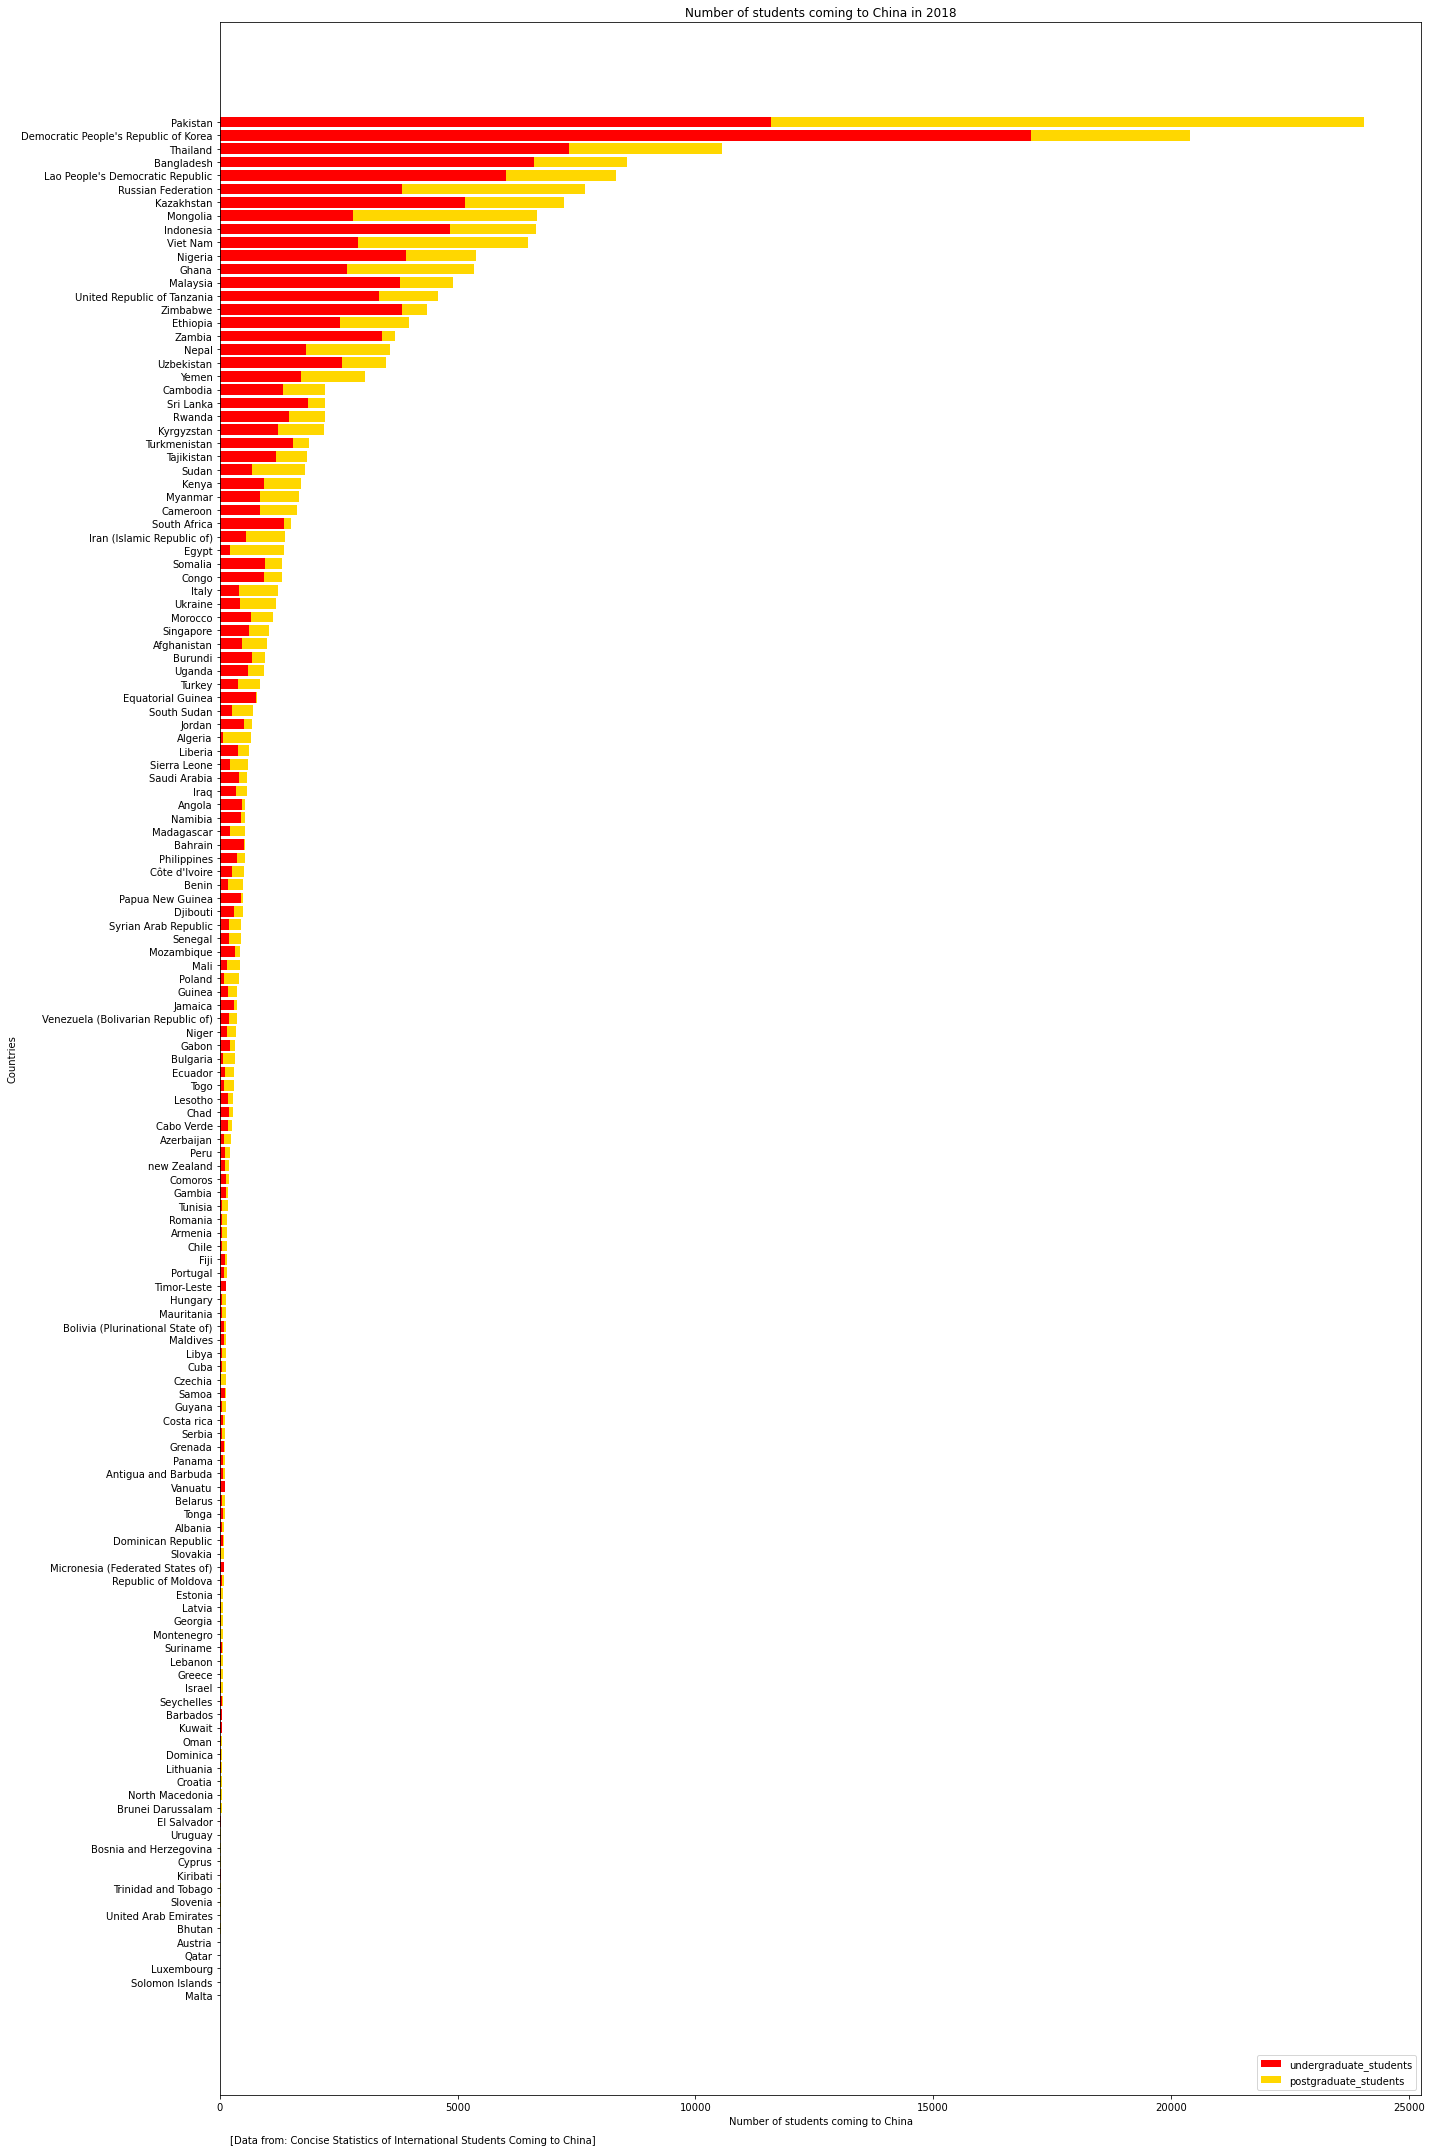

In [59]:
plt.barh(ind, undergraduate_students, label='undergraduate_students', color='red')
plt.barh(ind, postgraduate_students, left=undergraduate_students, label='postgraduate_students', color='gold')
plt.gca().invert_yaxis()

plt.yticks(ind, countries)
plt.xlabel("Number of students coming to China")
plt.ylabel("Countries")
plt.title("Number of students coming to China in 2018")
plt.legend(loc="lower right")

plt.annotate('[Data from: Concise Statistics of International Students Coming to China]', (0,0), (10,-40), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

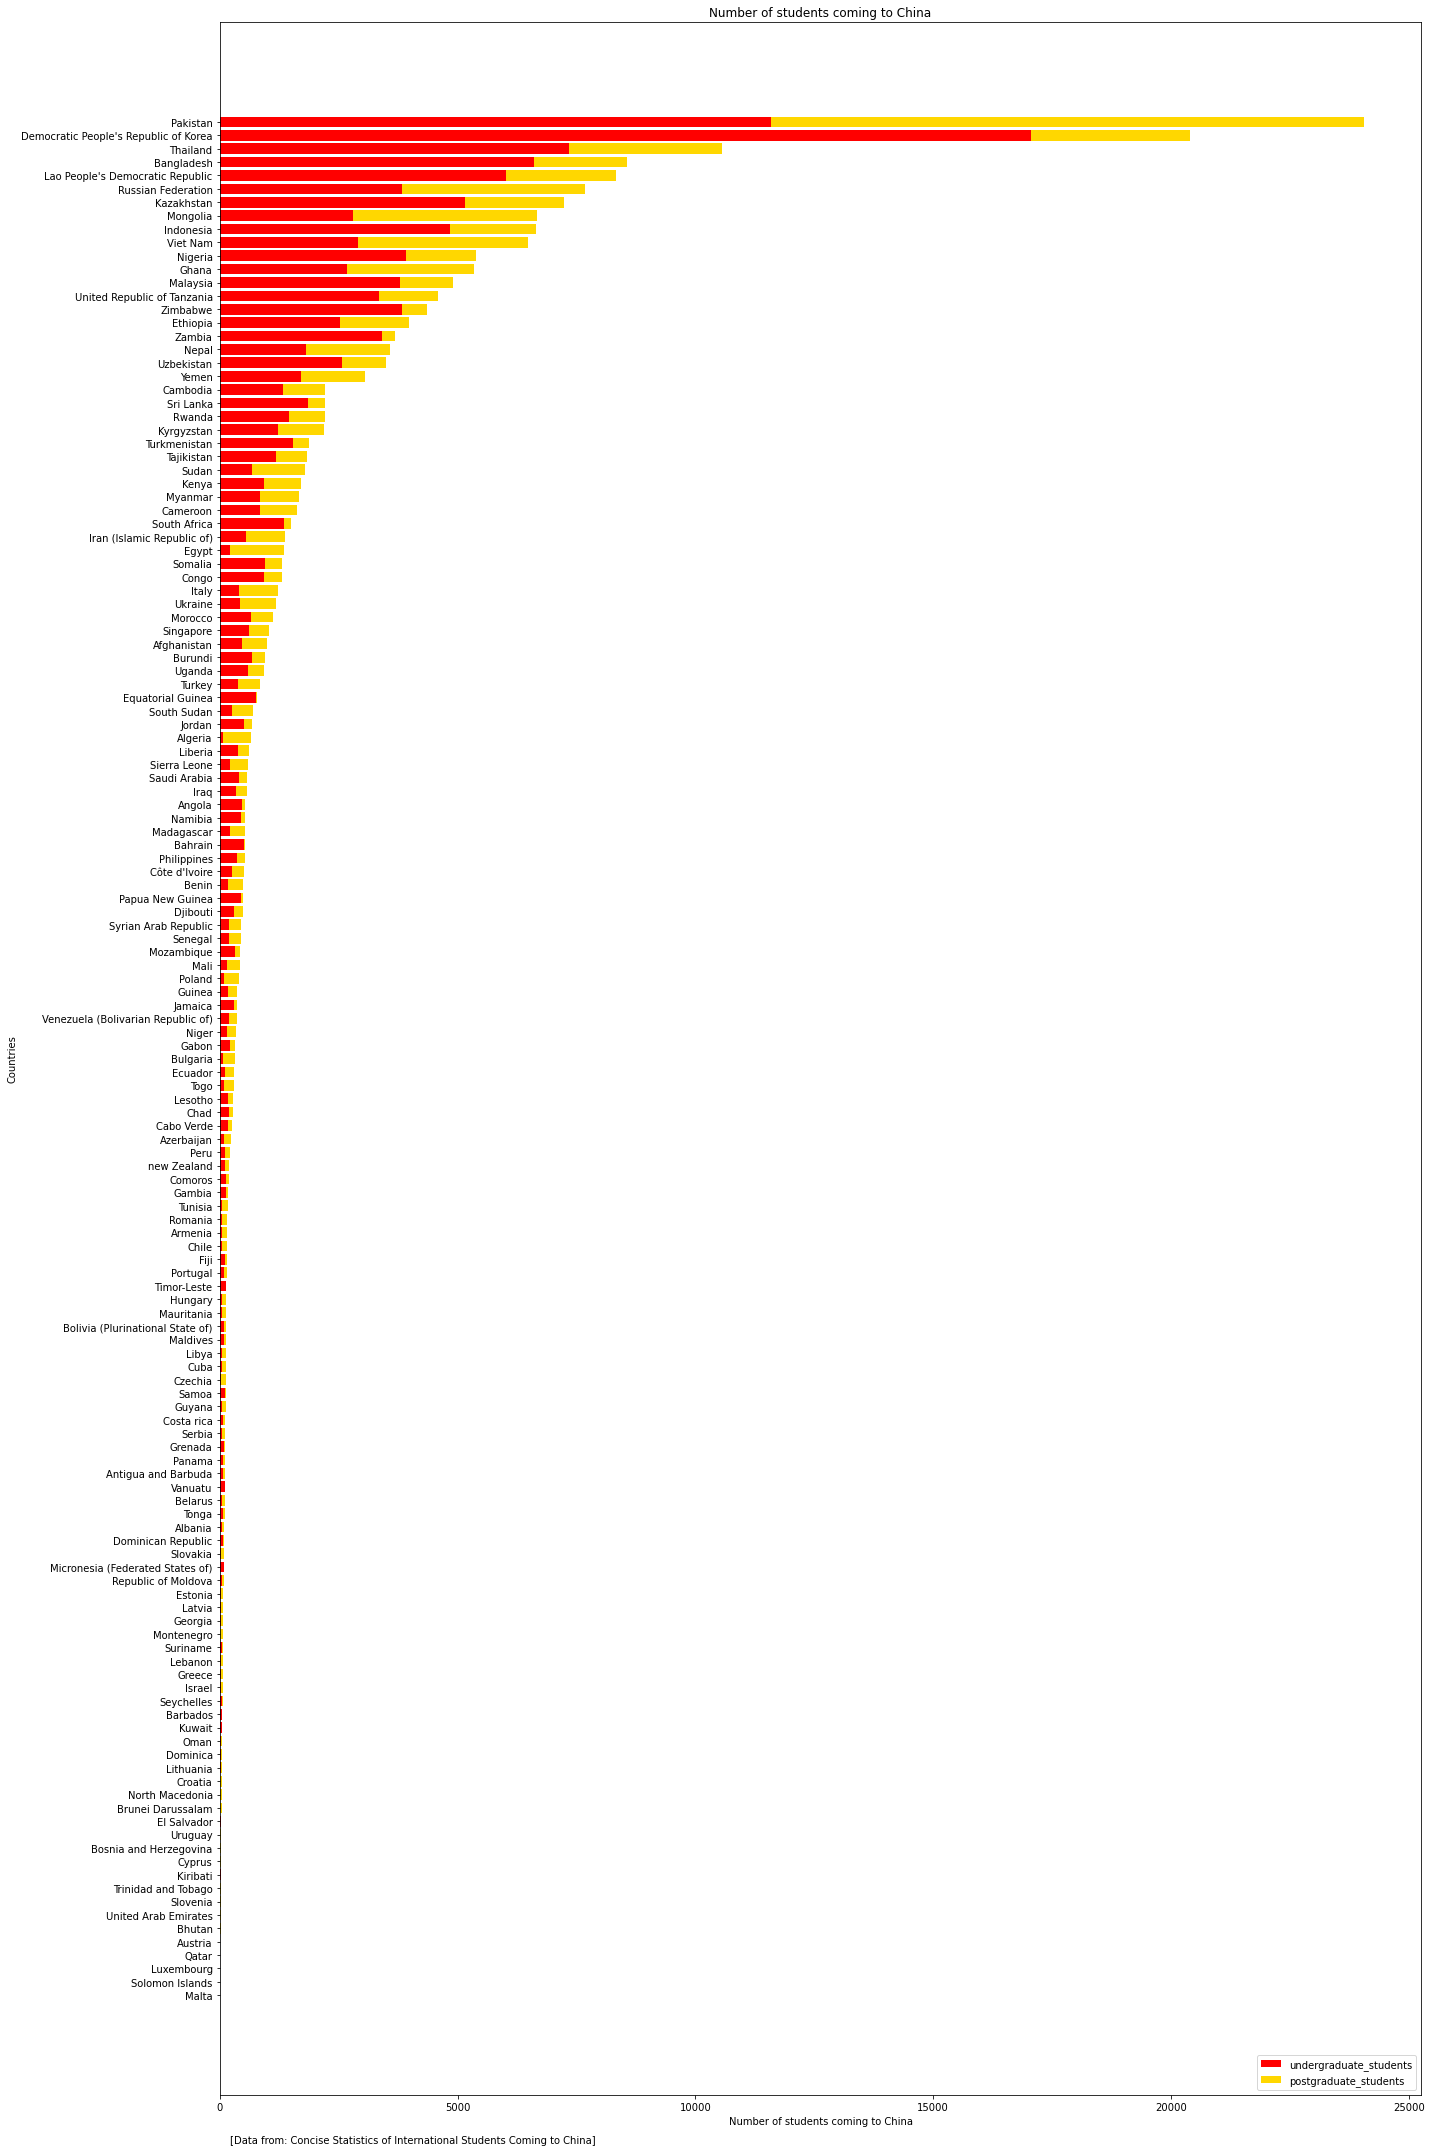

In [60]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC.sqlite")

In [61]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query1 = '''
WITH algeria_a as (
	select 
	region,
	year,
	avg(stu_CTC) as Africa_
	from students_CTC
	where region = "Africa"
	group by year
),
algeria_b as (
	select 
	region,
	year,
	avg(stu_CTC) as America_
	from students_CTC
	where region = "America"
	group by year
),
algeria_c as (
	select 
	region,
	year,
	avg(stu_CTC) as Asia_
	from students_CTC
	where region = "Asia"
	group by year
),
algeria_d as (
	select 
	region,
	year,
	avg(stu_CTC) as Eurppe_
	from students_CTC
	where region = "Eurppe"
	group by year
),
algeria_e as (
	select 
	region,
	year,
	avg(stu_CTC) as Oceania_
	from students_CTC
	where region = "Oceania"
	group by year
)
select 
	a.*,
	b.America_,
	c.Asia_,
	d.Eurppe_,
	e.Oceania_
from algeria_a a
left join algeria_b b on (a.year = b.year)
left join algeria_c c on (a.year = c.year) 
left join algeria_d d on (a.year = d.year) 
left join algeria_e e on (a.year = e.year)
'''

In [62]:
V2=pd.read_sql(query1,conn)##read in the data
V2.head(10)

,region,year,Africa_,America_,Asia_,Eurppe_,Oceania_
0,Africa,10,326.340909,98.736842,3538.595238,741.000000,94.333333
1,Africa,11,408.886364,119.052632,3783.238095,810.925926,114.555556
2,Africa,12,540.159091,141.052632,4153.333333,939.259259,123.777778
3,Africa,13,678.750000,162.315789,4497.428571,1041.592593,142.111111
4,Africa,14,860.363636,180.368421,4640.357143,1150.629630,168.555556
5,Africa,15,1038.272727,216.894737,4933.500000,1148.777778,174.444444
6,Africa,16,1288.318182,250.526316,5499.857143,1278.814815,219.666667
7,Africa,17,1570.977273,295.526316,6084.785714,1410.148148,259.555556
8,Africa,18,1724.363636,267.368421,6087.785714,1355.851852,239.555556


In [63]:
# Disconnect from connection
conn.close()

<function matplotlib.pyplot.show(close=None, block=None)>

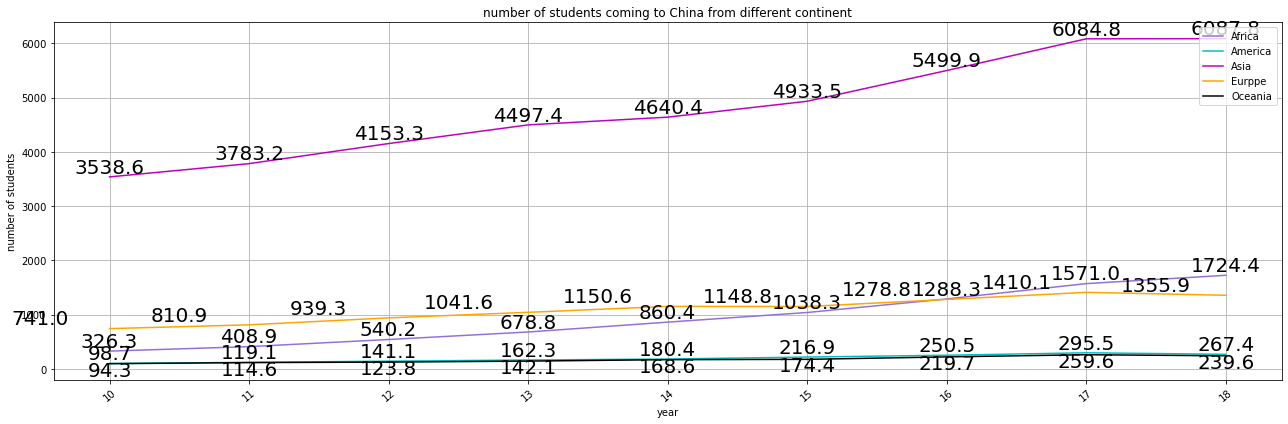

In [64]:
##Plot 
plt.figure(figsize=(18,6))
plt.plot(V2.loc[:,"year"],V2.loc[:,"Africa_"],color="mediumpurple")##set the line of "Trump_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"America_"],color="c")##set the line of "Clinton_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"Asia_"],color="m")##set the line of "Trump_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"Eurppe_"],color="orange")##set the line of "Clinton_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"Oceania_"],color="black")##set the line of "Trump_state"
plt.xticks(rotation=40)
plt.title("number of students coming to China from different continent")
plt.xlabel("year")##label the x axis
plt.ylabel("number of students")##label the y axis

Africa = round(V2['Africa_'],1)
America = round(V2['America_'],1)
Asia = round(V2['Asia_'],1)
Eurppe = round(V2['Eurppe_'],1)
Oceania = round(V2['Oceania_'],1)
year = V2['year']
for a, b in zip(year, Africa):
    plt.text(a, b, b,ha="center", va="bottom", fontsize=20)
for c, d in zip(year, America):
    plt.text(c, d, d,ha="center", va="bottom", fontsize=20)
for e, f in zip(year,Asia):
    plt.text(e, f, f,ha="center", va="bottom", fontsize=20)
for g, h in zip(year, Eurppe):
    plt.text(g-0.5, h, h,ha="center", va="bottom", fontsize=20)
for i, j in zip(year,Oceania):
    plt.text(i, j-300, j,ha="center", va="bottom", fontsize=20)             

plt.legend(["Africa","America","Asia","Eurppe","Oceania"],loc="upper right", fontsize=10)
plt.grid()
plt.show## show the plot

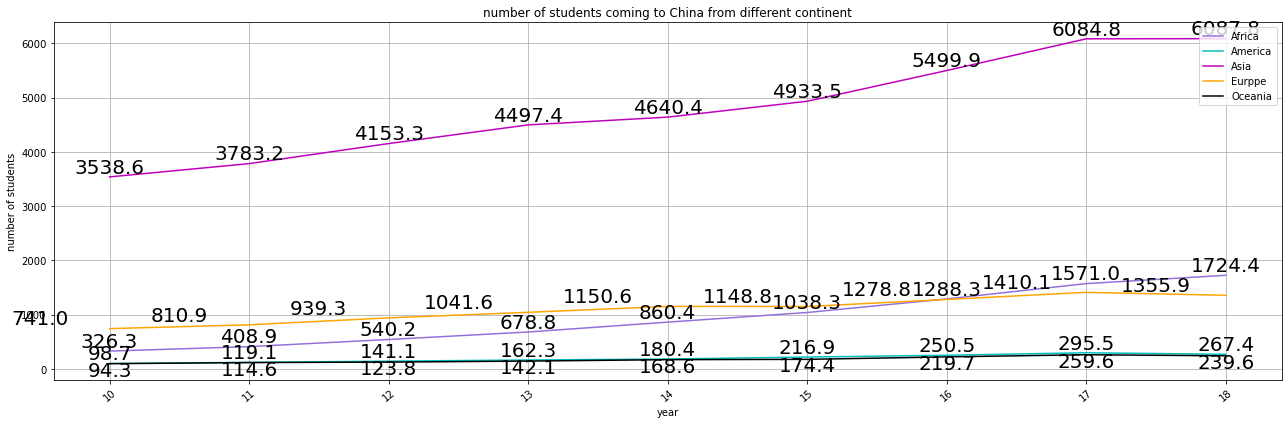

In [65]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC.sqlite")

In [66]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query1 = '''
WITH algeria_a as (
	select 
	year,
	avg(stu_CTC) as stu_CTC_
    from students_CTC
    group by year
),
algeria_b as (
	select 
	year,
	avg(stu_degree) as stu_degree_
    from students_CTC
    group by year
),
algeria_c as (
	select 
	year,
	avg(stu_non_degree) as stu_non_degree_
    from students_CTC
    group by year
),
algeria_d as (
	select 
	year,
	avg(stu_postgra) as stu_postgra_
    from students_CTC
    group by year
),
algeria_e as (
	select 
	year,
	avg(stu_undergra) as stu_undergra_
    from students_CTC
    group by year
)
select 
	a.*,
	b.stu_degree_,
	c.stu_non_degree_,
	d.stu_postgra_,
	e.stu_undergra_
from algeria_a a
left join algeria_b b on (a.year = b.year)
left join algeria_c c on (a.year = c.year) 
left join algeria_d d on (a.year = d.year) 
left join algeria_e e on (a.year = e.year)
'''

In [67]:
V3=pd.read_sql(query1,conn)##read in the data
V3.head(10)

,year,stu_CTC_,stu_degree_,stu_non_degree_,stu_postgra_,stu_undergra_
0,10,1317.106383,619.971631,697.170213,143.453901,469.198582
1,11,1433.156028,686.226950,746.929078,175.617021,504.595745
2,12,1612.489362,792.113475,820.375887,208.553191,553.808511
3,13,1781.865248,852.063830,929.765957,235.971631,602.638298
4,14,1906.113475,950.787234,955.326241,283.510638,650.368794
5,15,2053.893617,1071.595745,982.297872,321.695035,727.035461
6,16,2332.943262,1231.404255,1101.539007,389.283688,809.099291
7,17,2629.141844,1431.460993,1197.680851,468.326241,906.907801
8,18,2662.432624,1539.765957,1122.666667,531.893617,921.539007


In [68]:
# Disconnect from connection
conn.close()

<function matplotlib.pyplot.show(close=None, block=None)>

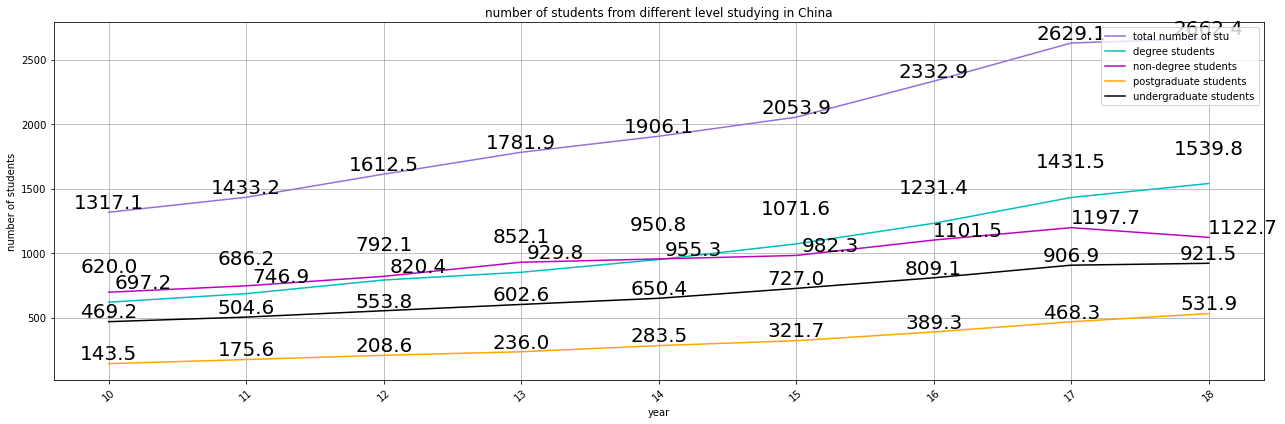

In [69]:
##Plot 
plt.figure(figsize=(18,6))
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_CTC_"],color="mediumpurple")##set the line of "Trump_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_degree_"],color="c")##set the line of "Clinton_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_non_degree_"],color="m")##set the line of "Trump_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_postgra_"],color="orange")##set the line of "Clinton_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_undergra_"],color="black")##set the line of "Trump_state"
plt.xticks(rotation=40)
plt.title("number of students from different level studying in China")
plt.xlabel("year")##label the x axis
plt.ylabel("number of students")##label the y axis

stu_CTC = round(V3['stu_CTC_'],1)
stu_degree = round(V3['stu_degree_'],1)
stu_non_degree = round(V3['stu_non_degree_'],1)
stu_postgra = round(V3['stu_postgra_'],1)
stu_undergra = round(V3['stu_undergra_'],1)
year = V3['year']
for a, b in zip(year, stu_CTC):
    plt.text(a, b, b,ha="center", va="bottom", fontsize=20)
for c, d in zip(year, stu_degree):
    plt.text(c, d+200, d,ha="center", va="bottom", fontsize=20)
for e, f in zip(year,stu_non_degree):
    plt.text(e+0.25, f, f,ha="center", va="bottom", fontsize=20)
for g, h in zip(year, stu_postgra):
    plt.text(g, h, h,ha="center", va="bottom", fontsize=20)
for i, j in zip(year,stu_undergra):
    plt.text(i, j, j,ha="center", va="bottom", fontsize=20)             

plt.legend(["total number of stu","degree students","non-degree students","postgraduate students","undergraduate students"],loc="upper right", fontsize=10)
plt.grid()
plt.show## show the plot

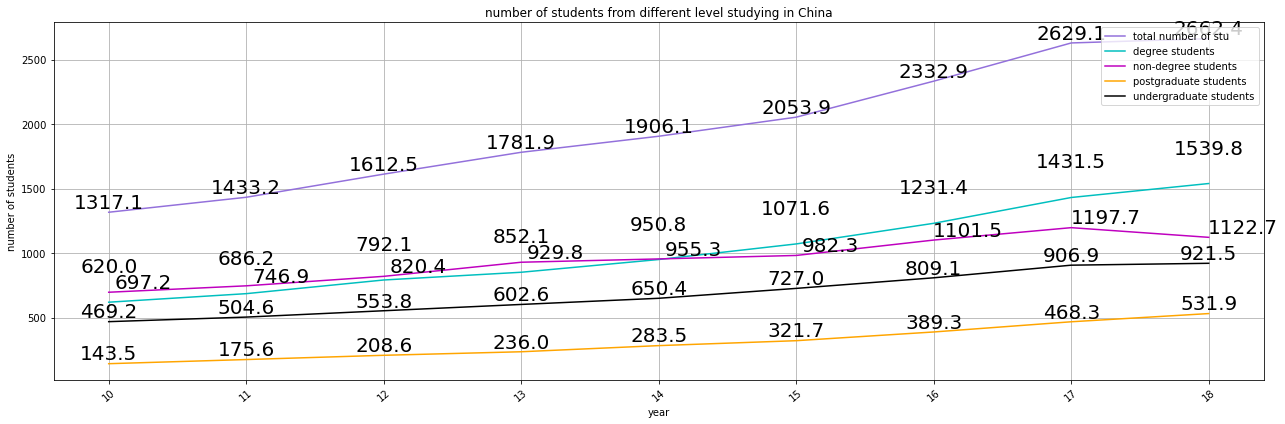

In [70]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC_new.sqlite")

# We can then write data to this database using .to_sql() method
students_CTC_new.to_sql(name="students_CTC_new",con=conn,index=False)

pd.read_sql("select * from students_CTC_new", con)

ValueError: Table 'students_CTC_new' already exists.

In [71]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC_new.sqlite")

In [72]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query2 = '''
WITH algeria_a as (
	select 
	year,
	avg(stu_CTC) as developing_countries
	from students_CTC_new
	where HDI_cat = "developing"
	group by year
),
algeria_b as (
	select 
	year,
	avg(stu_CTC) as developed_countries
	from students_CTC_new
	where HDI_cat = "developed"
	group by year
),
algeria_c as (
	select 
	year,
	avg(stu_CTC) as last_developed_countries
	from students_CTC_new
	where HDI_cat = "Least Developed Countries"
	group by year
)
select 
	a.*,
	b.developed_countries,
	c.last_developed_countries
from algeria_a a
left join algeria_b b on (a.year = b.year)
left join algeria_c c on (a.year = c.year)  
'''

In [73]:
V4=pd.read_sql(query2,conn)##read in the data
V4.head(10)

,year,developing_countries,developed_countries,last_developed_countries
0,2010,1217.536585,500.769231,406.638889
1,2011,1354.060976,617.769231,508.277778
2,2012,1575.853659,650.076923,636.805556
3,2013,1768.707317,769.923077,813.305556
4,2014,1911.939024,742.384615,977.916667
5,2015,1989.731707,709.923077,1274.194444
6,2016,2265.158537,719.538462,1611.055556
7,2017,2624.134146,753.153846,2088.027778
8,2018,2711.231707,651.384615,2430.638889


In [74]:
# Disconnect from connection
conn.close()

<function matplotlib.pyplot.show(close=None, block=None)>

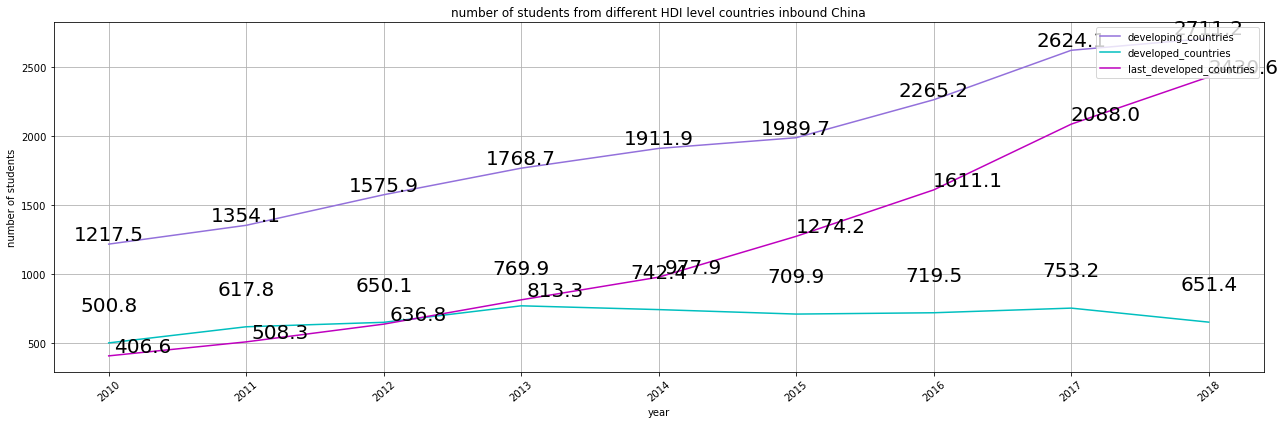

In [75]:
##Plot 
plt.figure(figsize=(18,6))
plt.plot(V4.loc[:,"year"],V4.loc[:,"developing_countries"],color="mediumpurple")##set the line of "Trump_state"
plt.plot(V4.loc[:,"year"],V4.loc[:,"developed_countries"],color="c")##set the line of "Clinton_state"
plt.plot(V4.loc[:,"year"],V4.loc[:,"last_developed_countries"],color="m")##set the line of "Trump_state"
plt.xticks(rotation=40)
plt.title("number of students from different HDI level countries inbound China")
plt.xlabel("year")##label the x axis
plt.ylabel("number of students")##label the y axis

developing_countries = round(V4['developing_countries'],1)
developed_countries = round(V4['developed_countries'],1)
last_developed_countries = round(V4['last_developed_countries'],1)
year = V4['year']
for a, b in zip(year, developing_countries):
    plt.text(a, b, b,ha="center", va="bottom", fontsize=20)
for c, d in zip(year, developed_countries):
    plt.text(c, d+200, d,ha="center", va="bottom", fontsize=20)
for e, f in zip(year,last_developed_countries):
    plt.text(e+0.25, f, f,ha="center", va="bottom", fontsize=20)

plt.legend(["developing_countries","developed_countries","last_developed_countries"],loc="upper right", fontsize=10)
plt.grid()
plt.show## show the plot

#### statistical learning

In [419]:
students_CTC_new = pd.read_excel("stu_CTC_new.xlsx")
students_CTC_new.head(4)

,Unnamed: 0,Country Name,region,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,...,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
0,0,Afghanistan,Asia,2010,225,115,9,124,101,63,...,0,7759,178945028,4180.438,1101.6867,1.69,1.597483e+10,0.002115,0.280000,Least Developed Countries
1,1,Afghanistan,Asia,2011,291,155,16,171,120,90,...,0,9344,234413053,4180.438,1165.2520,1.69,1.604294e+10,0.001939,0.309278,Least Developed Countries
2,2,Afghanistan,Asia,2012,335,181,24,205,130,95,...,0,9685,469220111,4180.438,1186.6525,1.69,1.808878e+10,0.002026,0.283582,Least Developed Countries
3,3,Afghanistan,Asia,2013,385,210,41,251,134,102,...,0,13338,337854104,4180.438,1243.4696,4.80,1.910189e+10,0.001986,0.264935,Least Developed Countries


In [420]:
students_CTC_new.replace({"HDI_cat":{"Least Developed Countries":0,"developing":0,"developed":1}},inplace=True)
students_CTC_new.shape

(1179, 23)

In [421]:
students_CTC_new.columns

Index(['Unnamed: 0', 'Country Name', 'region ', 'year', 'stu_CTC',
       'stu_undergra', 'stu_postgra', 'stu_degree', 'stu_non_degree',
       'scholarship_num_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance ', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'],
      dtype='object')

In [422]:
students_CTC_new=students_CTC_new.rename(columns={ 'region ': 'region','distance ':'distance'}) 

In [423]:
students_CTC_new.columns

Index(['Unnamed: 0', 'Country Name', 'region', 'year', 'stu_CTC',
       'stu_undergra', 'stu_postgra', 'stu_degree', 'stu_non_degree',
       'scholarship_num_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'],
      dtype='object')

In [424]:
# Filter method to "filter out" columns
students_CTC_new0=students_CTC_new.filter(['scholarship_num_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'])

Set up data in the SKLEARN framework (i.e. outcome separated from the predictors).

In [425]:
# Filter method to "filter out" columns
students_CTC_new1=students_CTC_new.filter(['stu_CTC','scholarship_num_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'])

In [426]:
students_CTC_new1.replace(np.inf, 0, inplace=True)
students_CTC_new1=students_CTC_new1.fillna(0)

classification model

In [427]:
students_CTC_N1=students_CTC_new1.copy()

In [428]:
students_CTC_N1["stu_CTC"]=np.log(students_CTC_N1["stu_CTC"]+1)

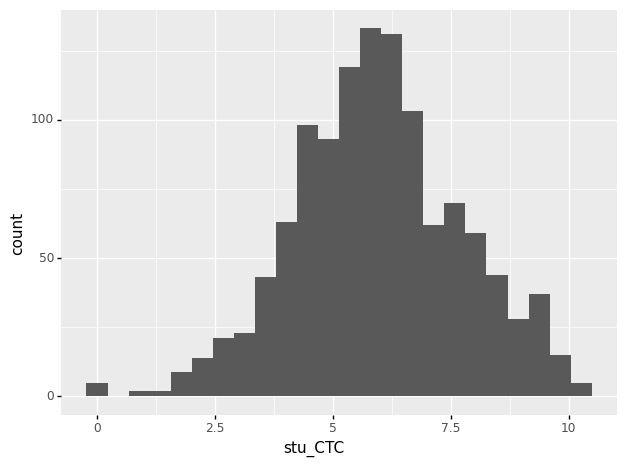

<ggplot: (192189905544)>

In [429]:
(
    ggplot(students_CTC_N1,aes(x="stu_CTC")) +
    geom_histogram() 
    
) 

In [430]:
students_CTC_N1.describe(include="all")

,stu_CTC,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
count,1179.000000,1179.000000,1179.000000,1179.00000,1179.000000,1179.000000,1179.000000,1.179000e+03,1179.000000,1179.000000,1179.000000,1.179000e+03,1179.000000,1179.000000,1179.000000
mean,5.950920,236.106022,18.679122,34.41265,71.986199,0.183206,15562.385072,9.489104e+09,8577.662511,1260.084080,8.101701,1.165351e+11,0.011418,0.276229,0.099237
std,1.774525,541.961065,11.495751,27.47044,138.094341,0.387000,17546.821885,1.891566e+10,3657.310517,1382.128478,6.513388,2.402330e+11,0.023927,0.214167,0.299106
min,0.000000,0.000000,-49.377400,-68.08530,-413.809800,0.000000,159.000000,1.598888e+06,1172.047000,-550.391200,0.110000,1.407812e+08,0.000014,0.000000,0.000000
25%,4.770685,35.000000,12.599700,11.48885,20.415100,0.000000,3978.500000,5.256222e+08,6164.891000,389.529750,3.430000,9.671523e+09,0.000940,0.121364,0.000000
50%,5.883322,89.000000,18.256900,31.20650,41.382400,0.000000,8841.000000,2.069005e+09,7686.079000,1179.769000,6.190000,3.378990e+10,0.003168,0.232209,0.000000
75%,7.068159,196.000000,23.378350,53.07850,75.890000,0.000000,21332.500000,7.748514e+09,11432.470000,1453.675500,10.702500,1.131125e+11,0.011361,0.366413,0.000000
max,10.261477,8168.000000,69.560800,142.45710,1478.346300,1.000000,96696.000000,1.481032e+11,19175.590000,14168.288500,32.020000,1.912998e+12,0.251461,1.586207,1.000000


In [431]:
##classify Y into two categroies 
mean_ctc = students_CTC_N1['stu_CTC'].mean()
students_CTC_N1["stu_CTC"] =np.where(students_CTC_N1["stu_CTC"]>=mean_ctc,1,0)

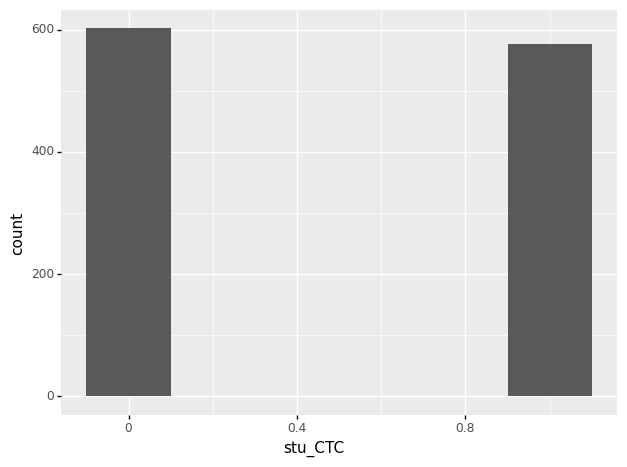

<ggplot: (192191861535)>

In [432]:
(
    ggplot(students_CTC_N1,aes(x="stu_CTC")) +
    geom_histogram() 
    
) 

In [433]:
students_CTC_N1['stu_CTC'] = students_CTC_N1['stu_CTC'].astype("category")

In [434]:
y = students_CTC_N1['stu_CTC'] 
X = students_CTC_N1[['precentage_of_scholarship', 'stu_teacher_ratio',
       'enrol_higheredu', 'financial_percapital', 'Academic_recognition',
       'outbound_higheredu', 'vis_a_vis_GDP', 'value_of_trade', 'distance',
       'unemployment', 'RD_number', 'HDI_cat']] # PREDICTORS: simplified for our purposes
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1998)

In [435]:
X.describe(include="all")

,precentage_of_scholarship,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,vis_a_vis_GDP,value_of_trade,distance,unemployment,RD_number,HDI_cat
count,1179.000000,1179.000000,1179.00000,1179.000000,1179.000000,1179.000000,1179.000000,1.179000e+03,1179.000000,1179.000000,1179.000000,1179.000000
mean,0.276229,18.679122,34.41265,71.986199,0.183206,15562.385072,0.011418,9.489104e+09,8577.662511,8.101701,1260.084080,0.099237
std,0.214167,11.495751,27.47044,138.094341,0.387000,17546.821885,0.023927,1.891566e+10,3657.310517,6.513388,1382.128478,0.299106
min,0.000000,-49.377400,-68.08530,-413.809800,0.000000,159.000000,0.000014,1.598888e+06,1172.047000,0.110000,-550.391200,0.000000
25%,0.121364,12.599700,11.48885,20.415100,0.000000,3978.500000,0.000940,5.256222e+08,6164.891000,3.430000,389.529750,0.000000
50%,0.232209,18.256900,31.20650,41.382400,0.000000,8841.000000,0.003168,2.069005e+09,7686.079000,6.190000,1179.769000,0.000000
75%,0.366413,23.378350,53.07850,75.890000,0.000000,21332.500000,0.011361,7.748514e+09,11432.470000,10.702500,1453.675500,0.000000
max,1.586207,69.560800,142.45710,1478.346300,1.000000,96696.000000,0.251461,1.481032e+11,19175.590000,32.020000,14168.288500,1.000000


In [436]:
X.replace(np.inf, 0, inplace=True)

In [437]:
students_CTC_N1=students_CTC_N1.fillna(0)
X["stu_teacher_ratio"] =np.where(X["stu_teacher_ratio"]<=0,0,X["stu_teacher_ratio"])
X["enrol_higheredu"] =np.where(X["enrol_higheredu"]<=0,0,X["enrol_higheredu"])
X["financial_percapital"] =np.where(X["financial_percapital"]<=0,0,X["financial_percapital"])

In [438]:
X["financial_percapital"] = np.log(X["financial_percapital"] +1)
X["outbound_higheredu"] = np.log(X["outbound_higheredu"]+1)
X["value_of_trade"] = np.log(X["value_of_trade"]+1)
X["vis_a_vis_GDP"] = np.log(X["vis_a_vis_GDP"]+1)
X["unemployment"] = np.log(X["unemployment"]+1)
X[ 'HDI_cat'] = X['HDI_cat'].astype("category")
X[ 'Academic_recognition'] = X['Academic_recognition'].astype("category")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1998)

In [439]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['precentage_of_scholarship', 'stu_teacher_ratio',
       'enrol_higheredu', 'financial_percapital',
       'outbound_higheredu', 'vis_a_vis_GDP', 'value_of_trade', 'distance',
       'unemployment', 'RD_number'])])

# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])

# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [

    
    # KNN with K tuning param
    {'model' : [KNN_C()],
     'model__n_neighbors':[2,3,4,5,10,15,20,25,30]},
    
    # KNN with K tuning param
    {'model' : [LR()],
     'model__penalty':["l1","l2"],
    'model__C':(0.01, 0.05, 0.1,0.2)},

    # Random forest with the N Estimators tuning param
    {'model' : [RF_C()],
     'model__max_depth':[3,4,5,6],
     'model__n_estimators':[300,500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['precentage_of_scholarship',
                                                                          'stu_teacher_ratio',
                                                                          'enrol_higheredu',
                                                                          'financial_percapital',
                                                                          'outbound_higheredu',
                                                                          'vis_a_vis_GDP',
                                                                          'value_of_trade',
                                        

In [440]:
search.best_params_

{'model': RandomForestClassifier(max_depth=6, n_estimators=1000),
 'model__max_depth': 6,
 'model__n_estimators': 1000}

In [441]:
search.best_score_ # Mean out-of-sample (CV) error

0.9773447901337045

In [442]:
rf_mod = search.best_estimator_

In [443]:
m.roc_auc_score(train_y,rf_mod.predict_proba(train_X)[:,1])

0.9966521285091221

In [444]:
m.accuracy_score(train_y,rf_mod.predict(train_X))

0.9694570135746606

In [445]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)

In [446]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,precentage_of_scholarship,0.100000,0.005189,0.089622,0.110378
1,outbound_higheredu,0.087104,0.008821,0.069463,0.104745
2,value_of_trade,0.065158,0.004988,0.055183,0.075134
3,enrol_higheredu,0.034163,0.002194,0.029776,0.038550
4,distance,0.030543,0.001239,0.028065,0.033021
5,unemployment,0.027828,0.001838,0.024152,0.031504
6,stu_teacher_ratio,0.024887,0.002771,0.019345,0.030429
7,vis_a_vis_GDP,0.009955,0.002307,0.005340,0.014569
8,financial_percapital,0.006787,0.000715,0.005356,0.008218
9,RD_number,0.005656,0.001239,0.003178,0.008134


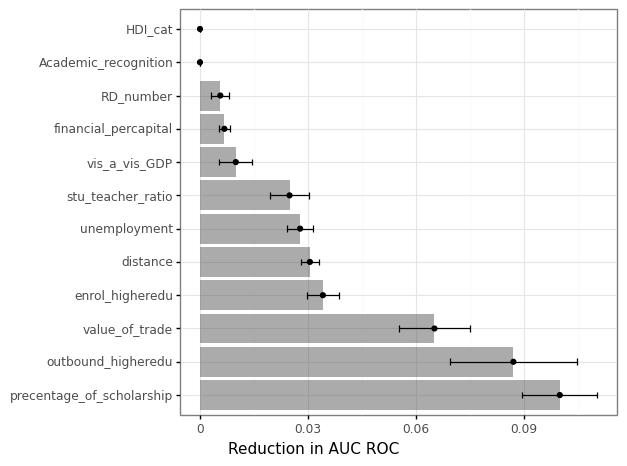

<ggplot: (192188803223)>

In [447]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

### Model Interpretation

#### Permutation Importance

Partial Dependency Plots

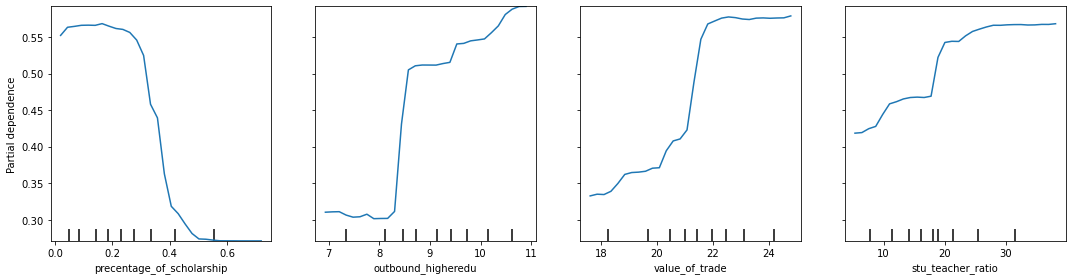

In [448]:
# Target specific features
features = ['precentage_of_scholarship','outbound_higheredu', 'value_of_trade','stu_teacher_ratio']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    rf_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)
# display.figure_.set_figwidth(15)
# display.figure_.set_figheight(4)

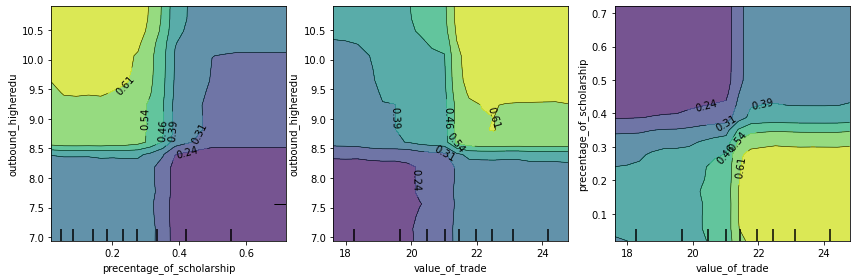

In [449]:
# Feed in the ineraction as a nested list
interacted_features = [['precentage_of_scholarship','outbound_higheredu'],['value_of_trade','outbound_higheredu'],['value_of_trade','precentage_of_scholarship']] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, train_X, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

ICE Plots

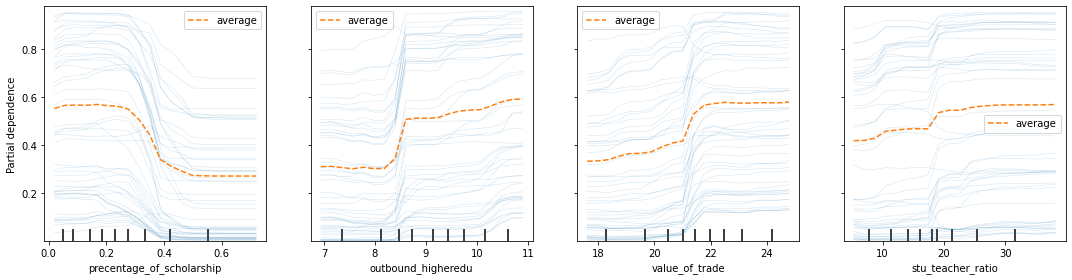

In [450]:
features = ['precentage_of_scholarship','outbound_higheredu', 'value_of_trade','stu_teacher_ratio']
fig, ax = plt.subplots(figsize=(15, 4))
display = PartialDependenceDisplay.from_estimator(
    rf_mod,
    train_X,
    features,
    kind="both", # "average" = just PDP, "individual" = just ICE
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    n_cols=len(features),
    ax = ax
)
display.figure_.subplots_adjust(hspace=0.3)

The End 